In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/SparrowChang/CS6375_assignment1/main/auto%2Bmpg/auto-mpg.data'  # Replace with the actual path to the dataset

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(url, delimiter='\s+', header=None)

# Create a mapping dictionary for column name changes
column_mapping = {0: 'mpg', 
                  1: 'cylinders', 
                  2: 'displacement',
                  3: 'horsepower',
                  4: 'weight',
                  5: 'acceleration',
                  6: 'model year',
                  7: 'origin',
                  8: 'car name'}
# Rename the columns using the mapping dictionary
df = df.rename(columns=column_mapping)

In [3]:
# Step 2: Pre-processing
# Convert categorical variables to numerical variables (if applicable)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# Drop the columns that are not relevant for the regression analysis
del df['car name']
print(df.dtypes)
print(df.shape)

# Create a StandardScaler object
scaler = StandardScaler()
normalized_df = df.copy()
normalized_df.iloc[:, 1:] = scaler.fit_transform(normalized_df.iloc[:, 1:])
# Remove null or NA values
normalized_df = normalized_df.dropna()
# Remove redundant rows
normalized_df = normalized_df.drop_duplicates()
print(normalized_df)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object
(398, 8)
      mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    18.0   1.498191      1.090604    0.664133  0.630870     -1.295498   
1    15.0   1.498191      1.503514    1.574594  0.854333     -1.477038   
2    18.0   1.498191      1.196232    1.184397  0.550470     -1.658577   
3    16.0   1.498191      1.061796    1.184397  0.546923     -1.295498   
4    17.0   1.498191      1.042591    0.924265  0.565841     -1.840117   
..    ...        ...           ...         ...       ...           ...   
393  27.0  -0.856321     -0.513026   -0.480448 -0.213324      0.011586   
394  44.0  -0.856321     -0.925936   -1.364896 -0.993671      3.279296   
395  32.0  -0.856321     -0.561039   -0.532474 -0.798585     -1.440730   
396  28.0  -0.856321     -0.705077   -0.66254

<function matplotlib.pyplot.show(*args, **kw)>

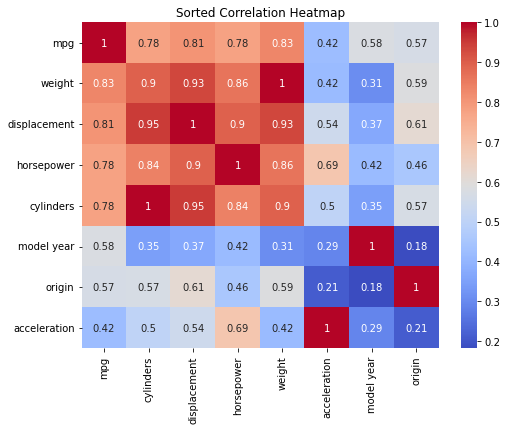

In [4]:
# Step 2: Pre-processing about abs() correlation matrix
# Calculate the correlation matrix
corr_matrix = normalized_df.corr()

# Take the absolute values of the correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Sort the correlation matrix by a specific column
sort_column = 'mpg'
sorted_abs_corr_matrix = abs_corr_matrix.sort_values(by=sort_column, ascending=False)

# Create a correlation heatmap for the sorted matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sorted_abs_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sorted Correlation Heatmap')
plt.show

In [5]:
# Step 3: Split the dataset into training and test sets
X = normalized_df.iloc[:, 1:]
X = np.column_stack((np.ones(len(X)), X))
y = normalized_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 5: Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

In [8]:
# Step 6: Logging and output
log_file_path = 'path_to_log_file_MLlib.txt'  # Replace with the actual path to the log file

# Write the parameters and error values to the log file
with open(log_file_path, 'w') as log_file:
    log_file.write(f'Mean squared error (MSE): {mse}\n')
    log_file.write(f'R2 score: {r2}\n')
    log_file.write(f'Explained variance: {explained_var}\n')

# Output weight coefficients
weights = model.coef_
intercept = model.intercept_
print('Weight Coefficients:', weights)
print('Intercept:', intercept)

# Output additional evaluation statistics
print('MSE:', mse)
print('R2 Score:', r2)
print('Explained Variance:', explained_var)

# Repeat the above steps with different parameter values to check for better solutions
# Compare the performance metrics and choose the best set of parameters

# Answering the question
# Whether the package has found the best solution depends on the performance metrics and the specific requirements

Weight Coefficients: [ 0.         -0.58744888  1.5734024  -0.81888248 -5.19444666  0.10452275
  2.8352568   1.29245436]
Intercept: 23.55294959691128
MSE: 10.710864418838403
R2 Score: 0.7901500386760344
Explained Variance: 0.7915327760182195
